In [49]:
import glob,os

import pandas as pd

In [17]:
cenik_stats_folder    = "/data/projects/NSP/revision_analysis/mapping/ceniklab"
external_stats_folder = "/data/projects/NSP/revision_analysis/mapping/GSE150316" 

In [18]:
pre_cenik_stats_files    = glob.glob(cenik_stats_folder + "/*stats")
pre_external_stats_files = glob.glob(external_stats_folder + "/*stats")

In [23]:
"""
def get_cenik_exp_names(file_list):
    result_couples = []
    
    for f in file_list:
        exp_name = os.path.basename(f).split(".")[0]
        exp_name = exp_name.replace("20200717-", "").replace("-setB", "")
        result_couples.append( (exp_name, f) )
        
    return result_couples
"""

def get_exp_names(file_list):
    result = []
    
    for f in file_list:
        exp_name = os.path.basename(f).split(".")[0]
        result.append( exp_name )
        
    return result

In [25]:
cenik_experiments    = get_exp_names(pre_cenik_stats_files)
external_experiments = get_exp_names(pre_external_stats_files)

In [44]:
def get_number_of_raw_reads(exp_name, folder):
    bt2_log_file = os.path.join(folder, exp_name + ".mapping.log")
    
    with open(bt2_log_file, "rt") as input_stream:
        file_lines = input_stream.readlines()
        
    return int(file_lines[0].split()[0])

def get_count_stats( exp_name, folder ):
    stats_file = os.path.join(folder, exp_name + ".stats")
    result = {"NSP1": 0, "NSP2": 0, "total" : 0}
    
    with open(stats_file, "rt") as input_stream:
        for this_line in input_stream:
            contents = this_line.split()
            
            if contents[0].upper() == "NSP1":
                result["NSP1"] += int(contents[2])
            elif contents[0].upper() == "NSP2":
                result["NSP2"] += int(contents[2])
                
            result["total"] += int(contents[2])
            
    return result
        

def get_stats_main( experiment_names, folder ):
    result = dict()
    
    for e in experiment_names:
        #result[e] = { "NSP1" : 0, "NSP2" : 0,  "total_mapped" : 0, "total_raw" : 0 }
        
        count_stats = get_count_stats( e, folder )
        raw_reads   = get_number_of_raw_reads( e, folder )
        
        result[e]                 = dict()
        result[e]["NSP1"]         = count_stats["NSP1"]
        result[e]["NSP2"]         = count_stats["NSP2"]
        result[e]["total_mapped"] = count_stats["total"]
        result[e]["total_raw"]    = raw_reads
        
    return result


In [41]:
get_count_stats('20200717-NSP1-RNA-seq-HEK-2-setB', cenik_stats_folder)

{'NSP1': 17374, 'NSP2': 518, 'total': 2301053}

In [42]:
get_count_stats('20200717-NSP2-RNA-seq-HEK-2-setB', cenik_stats_folder)

{'NSP1': 55, 'NSP2': 149623, 'total': 2948910}

In [46]:
ceniklab_stats_dict = get_stats_main(cenik_experiments, cenik_stats_folder )
external_stats_dict = get_stats_main(external_experiments, external_stats_folder )

In [65]:
ceniklab_counts_df = pd.DataFrame.from_dict(ceniklab_stats_dict).transpose()
ceniklab_counts_df["NSP1_per_Mil"] = (ceniklab_counts_df.NSP1 / ceniklab_counts_df.total_mapped) * 1000000
ceniklab_counts_df["NSP2_per_Mil"] = (ceniklab_counts_df.NSP2 / ceniklab_counts_df.total_mapped) * 1000000

In [66]:
external_counts_df = pd.DataFrame.from_dict(external_stats_dict).transpose()
external_counts_df["NSP1_per_Mil"] = (external_counts_df.NSP1 / external_counts_df.total_mapped) * 1000000
external_counts_df["NSP2_per_Mil"] = (external_counts_df.NSP2 / external_counts_df.total_mapped) * 1000000

## NSP1 Counts in  HEK Cells

In [67]:
ceniklab_counts_df

,NSP1,NSP2,total_mapped,total_raw,NSP1_per_Mil,NSP2_per_Mil
20200717-NSP1-RNA-seq-HEK-2-setB,17374,518,2301053,40997938,7550.456248,225.114328
20200717-NSP2-RNA-seq-HEK-1-setB,34,117899,2450175,35003078,13.876560,48118.603773
20200717-NSP1-RNA-seq-HEK-1-setB,13645,451,1919963,34840423,7106.907789,234.900360
20200717-WT2-RNA-seq-HEK-2-setB,37,343,1704756,25935593,21.703986,201.201814
20200717-WT1-RNA-seq-HEK-1-setB,32,355,2131979,30927366,15.009529,166.511959
20200717-WT3-RNA-seq-HEK-3-setB,42,491,3030749,46271445,13.857961,162.006158
20200717-NSP2-RNA-seq-HEK-2-setB,55,149623,2948910,42398224,18.650959,50738.408429
20200717-NSP1-RNA-seq-HEK-3-setB,9432,298,1428006,25135784,6605.014265,208.682597
20200717-NSP2-RNA-seq-HEK-3-setB,37,117091,2448191,36914462,15.113200,47827.559206


## NSP1 Counts in Human Lung Cells

In [68]:
external_counts_df

,NSP1,NSP2,total_mapped,total_raw,NSP1_per_Mil,NSP2_per_Mil
GSM4698532,0,1,630044,8623084,0.000000,1.587191
GSM4698559,0,0,1373926,4728893,0.000000,0.000000
GSM4546588,0,2,1559352,7595644,0.000000,1.282584
GSM4698560,0,0,1306755,4917337,0.000000,0.000000
GSM4546592,0,0,243438,6001897,0.000000,0.000000
GSM4698549,156,1060,2424753,9303829,64.336450,437.157929
GSM4698537,0,11,1548455,8252338,0.000000,7.103855
GSM4546598,1,10,2183520,7306003,0.457976,4.579761
GSM4546586,0,1,7156976,24887726,0.000000,0.139724
GSM4698539,0,0,636333,7471748,0.000000,0.000000


In [103]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [6, 6]

import numpy as np

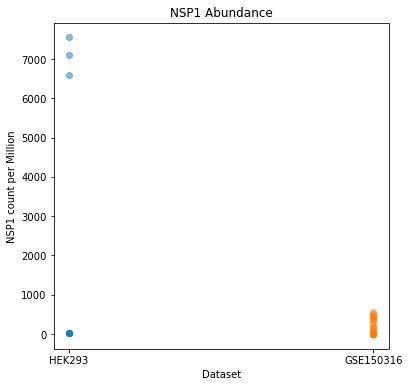

In [104]:
fig, ax = plt.subplots()

ceniklab_nsp1_norm = ceniklab_counts_df.NSP1_per_Mil
ceniklab_x         = [1 for x in ceniklab_nsp1_norm]

ax.plot(ceniklab_x, ceniklab_nsp1_norm, "o", alpha = 0.5)

external_nsp1_norm = external_counts_df.NSP1_per_Mil
external_x         = [2 for x in external_nsp1_norm]

plt.xlabel("Dataset")
plt.ylabel("NSP1 count per Million")
plt.title("NSP1 Abundance")

ax.plot(external_x, external_nsp1_norm, "o", alpha = 0.5, linewidth = 40);
plt.xticks((1,2), labels = ("HEK293", "GSE150316"), rotation = "horizontal");
plt.savefig("NSP1_abundance.pdf")